# Trabajo Práctico 2 - Matrices de Insumo Producto

## Integrantes-
Matilda Bartoli 175/23 \
Florencia Allami 484/23 \
Luca Emilio Petrarca 1261/23

In [1]:
import numpy as np
from funciones2 import *
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
np.random.seed(400)

## Expresando $(I−A)^{-1}$ como una suma infinita

### Consigna 1 - 

Queremos ver que $(I-A)^-1 = I + A + A^2 + A^3 + ... + A^n $ implica $\lim_{n \to \infty} A^{n+1} = 0$. Vamos a definir $A^0 = I$, siendo $I$ la identidad, para facilitar la escritura.

Primero, tomamos que $(I-A)^{-1} = \sum_{i=0}^{n}A^i$. Esto implica que $\forall \epsilon > 0, \exists n_0 $ tal que $\forall n \geq n_0 \implies 
\bigg|(I-A)^{-1} - \sum_{i=0}^{n}A^i \bigg| < \frac{\epsilon}{2}$.

Además, como $n+1 > n \geq n_0$, sé que $\bigg|(I-A)^{-1} - \sum_{i=0}^{n+1}A^i \bigg| < \frac{\epsilon}{2}$

Entonces, usando la desigualdad triangular, se puede ver que

$\bigg|\sum_{i=0}^{n+1}A^i - \sum_{i=0}^{n}A^i \bigg| \leq \bigg|\sum_{i=0}^{n+1}A^i - (I-A)^{-1} \bigg| + \bigg|(I-A)^{-1} - \sum_{i=0}^{n}A^i \bigg| < \epsilon$

$\bigg|\sum_{i=0}^{n+1}A^i - \sum_{i=0}^{n}A^i \bigg| = \bigg|A^{n+1}\bigg| < \epsilon $

Entonces, tengo que $\forall \epsilon > 0, \exists n_0 $ tal que $\forall n \geq n_0 \implies \bigg|A^{n+1}\bigg| < \epsilon$. Esto es la definición de límite, y es equivalente a decir que $\lim_{n \to \infty} A^{n+1} = 0$.

$\square$

### Consigna 2 - 

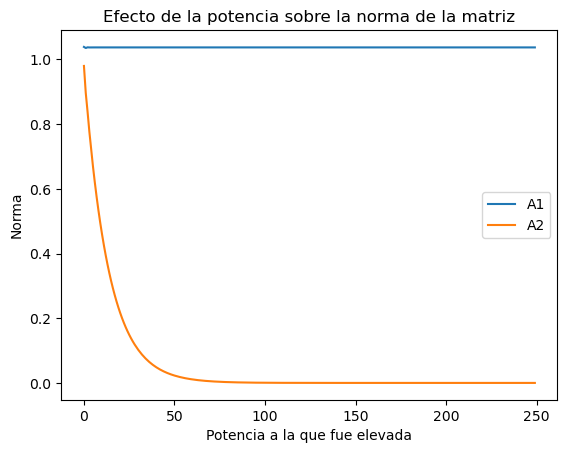

In [2]:
#hacer un gráfico que en el eje x tenga 250 N-es y en el eje y tiene, para cada N, el resultado de hacer |A^n|_2
#Esto con A1 y A2
A1 = np.array([[0.186, 0.521, 0.014, 0.32,  0.134],
              [0.24,  0.073, 0.219, 0.013, 0.327],
              [0.098, 0.12,  0.311, 0.302, 0.208],
              [0.173, 0.03,  0.133, 0.14,  0.074],
              [0.303, 0.256, 0.323, 0.225, 0.257]])

A2 = np.array([[0.186, 0.521, 0.014, 0.32,  0.134],
               [0.24,  0.073, 0.219, 0.013, 0.327],
               [0.098, 0.12,  0.311, 0.302, 0.208],
               [0.173, 0.03,  0.133, 0.14,  0.074],
               [0.003, 0.256, 0.323, 0.225, 0.257]])

#nótese que la única diferencia entre A1 y A2 es en el elemento A1[0,4]

#calculamos los vectores a1 y a2, las normas de las potencias
N = 250
a1, a2 = np.zeros(N), np.zeros(N)

potencia_A1 = A1.copy()
potencia_A2 = A2.copy()

for i in range(N):
    a1[i] = np.linalg.norm(potencia_A1, ord=2)
    a2[i] = np.linalg.norm(potencia_A2, ord=2)

    potencia_A1 = A1 @ potencia_A1
    potencia_A2 = A2 @ potencia_A2

#graficamos los resultados
plt.plot(a1, label="A1")
plt.plot(a2, label="A2")
plt.legend()
plt.xlabel("Potencia a la que fue elevada")
plt.ylabel("Norma")
plt.title("Efecto de la potencia sobre la norma de la matriz")
plt.show()

### Consigna 3 - 

In [3]:
mayor_autovalor_A1, autovector_A1 = metodo_potencia(A1, 250)
mayor_autovalor_A2, autovector_A2 = metodo_potencia(A2, 250)

print(f'Mayor autovalor de A1: {mayor_autovalor_A1}')
print(f'Mayor autovalor de A2: {mayor_autovalor_A2}')

Mayor autovalor de A1: 1.0
Mayor autovalor de A2: 0.92765144721236


### Consigna 4 - 

### Consigna 5 - 

In [4]:
#importamos las matrices
Arr = matriz_ip_del_pais_1()
Ass = matriz_ip_del_pais_2()

#calculamos su mayor autovalor
mayor_autovalorR, autovectorR = metodo_potencia(Arr)
mayor_autovalorS, autovectorS = metodo_potencia(Ass)

print("Mayor autovalor de la matriz de coeficientes técnicos de Colombia:", str(mayor_autovalorR))
print("Mayor autovalor de la matriz de coeficientes técnicos de México:", str(mayor_autovalorS))


Mayor autovalor de la matriz de coeficientes técnicos de Colombia: 0.37655222654114107
Mayor autovalor de la matriz de coeficientes técnicos de México: 0.2876346746892821


Como podemos ver, el mayor autovalor de la matriz insumo-producto de Colombia es $0.37655222654114107$ y el de México es $0.2876346746892821$, que son menores a $1$, por lo tanto la suma infinita de las potencias converge.

### Consigna 6 - 

#### **a) Parte 1: vector y matriz $E_n$**

Sea $E_{n}{z} = (I_{n} - \frac{1}{n} ee^{t})z$

Distribuyendo el vector $z$,  


$E_{n}{z} = z - \frac{1}{n} ee^{t}z$ (siendo $e^{t}z$  el producto escalar entre $e$ y $z$)

Luego, 


$E_{n}{z} = z - \frac{1}{n} e \sum_{i=1}^{n} e_i z_i $

Como $e$ es un vector de todos unos, 


$E_{n}{z} = z - \frac{1}{n} e \sum_{i=1}^{n}z_i $

Se puede ver que $\frac{1}{n} e \sum_{i=1}^{n}z_i$ es un vector de $\mathbb{R}^{n}$ donde cada componente es  el promedio de las componenentes del vector $z$. Llamando a este promedio como $z^{'}$ ,


$E_{n}{z} = (z_{1} - z^{'}, z_{2} - z^{'}, ....., z_{n}-z^{'})  $


Realizando el promedio de las componentes de $E_{n}{z}$, 


$\frac{1}{n}  \sum_{i=1}^{n}(z_i - z^{'}) $ =


$\frac{1}{n}  (\sum_{i=1}^{n}z_i - \sum_{i=1}^{n}z^{'}) $ = 

$\frac{1}{n}  ((\sum_{i=1}^{n}z_i)- nz^{'})$

Dado que  $z^{'} = \frac{1}{n} \sum_{i=1}^{n}z_i$ , 


$nz^{'} = \sum_{i=1}^{n}z_i$

Luego, el promedio de las componentes de $E_{n}{z}$ es igual a 

$\frac{1}{n}  (\sum_{i=1}^{n}z_i- \sum_{i=1}^{n}z_i) = 0$












 #### **Parte 2 : matriz y matriz $E_{n}$**

Sea $E_{n}A = (I_{n} - \frac{1}{n} ee^{t})A = A - \frac{1}{n} ee^{t}A$

Se observa que el vector que resulta de hacer $e^{t}A$ es igual a 


$e^{t}A = (\sum_{i=1}^{n}A_{i1}, \sum_{i=1}^{n}A_{i2}, ....., \sum_{i=1}^{n}A_{in})$, siendo cada componente del vector la suma de cada columna de A 


Al multiplicar dicho vector por $\frac{1}{n}e$ resulta una matriz que tiene todas las filas iguales, que llamamos $A^{'}$ de $\mathbb{R}^{n\times n}$, donde cada componente de cada columna tiene el promedio de la respectiva columna de A, es decir, 

$(\frac{1}{n}ee^{t}A)_{kj} = \frac{1}{n} \sum_{i=1}^{n}A_{ij} \quad \forall 1\leq k\leq n$


Luego, 

$E_{n}A = A - A^{'}$ 


$(E_{n}A)_{ij} = A_{ij} - A^{'}_{j}$


Mirando el promedio de cada columna de $E_{n}A$, vamos a considerar a $A^{'}_j$ como $A^{'}_{ij}$ para alguna fila $i$, aprovechando 

Promedio $(E_{n}A)_{j}$ =


$\frac{1}{n} \sum_{i=1}^{n}(A_{ij} - A^{'}_{j})$ =


$\frac{1}{n} (\sum_{i=1}^{n}A_{ij} - \sum_{i=1}^{n}A^{'}_{j})$  = 


$\frac{1}{n} (\sum_{i=1}^{n}A_{ij} - nA^{'}_{j})$ = 


Dado que $A^{'}_{j}= \frac{1}{n} \sum_{i=1}^{n}A_{ij}$, 


$nA^{'}_{j} = \sum_{i=1}^{n}A_{ij}$

Luego, 

Promedio $(E_{n}A)_{j}$ = $\frac{1}{n} (\sum_{i=1}^{n}A_{ij} - \sum_{i=1}^{n}A_{ij}) = 0 $

Concluimos que cuando se le aplica a la matriz $E_{n}$ una matriz como A, devuelve una matriz donde a cada elemento de A se le resta el promedio de la columna correspondiente al elemento. Asimismo, se observa que el promedio de cada columna de la matriz resultante es igual a cero. 


#### b) 

#### **Autovalores y Autovectores**

Para calcular los autovalores, observemos primero que $E_{n}$ es un proyector. Basta ver que $(E_{n})^2 = E_{n}$, 


$(E_{n})^2 = (I_{n} - \frac{1}{n} ee^{t})^{2} = I_{n}^{2} - 2\frac{1}{n} ee^{t} + (\frac{1}{n} ee^{t})^2$

Afirmo que $(\frac{1}{n} ee^{t})^2 = \frac{1}{n} ee^{t}$. Sé que $ ee^{t}$ es una matriz de todos $1$s,
multiplicado por $\frac{1}{n}$ me queda una matriz de todos $\frac{1}{n}$. Entonces

$((\frac{1}{n} ee^{t})^2)_{ij} = \sum_{i=1}^{n}\frac{1}{n^2} = n\frac{1}{n^2} = \frac{1}{n}$

Lo que restulta en una matriz con todos $\frac{1}{n}$, ergo no cambia. Continuo entonces,

$ I_{n}^{2} - 2\frac{1}{n} ee^{t} + (\frac{1}{n} ee^{t})^2 = I_n - \frac{1}{n} ee^{t} = E_{n}$

Luego, $E_{n}$ es un proyector. Por lo visto en la teórica, sabemos que los únicos autovalores de los proyectores son el cero y el uno. 


Ahora calculamos los autovectores, 


Sea $v$ un autovector $\neq 0$ de $\lambda = 1$ , 


$(E_{n})v= \lambda v$


$(I_n - \frac{1}{n} ee^{t})v = v$


$ v - \frac{1}{n} ee^{t}v = v$


$ \frac{1}{n} ee^{t}v = 0$


Dado que $e^{t}v$ es el producto escalar entre $e$ y $v$ tenemos, 

$ \frac{1}{n} e \sum_{i=1}^{n} e_i v_i = 0$

Para que la expresión de la izquierda sea igual a cero, el producto escalar entre $e$ y $v$ debe serlo, es decir, $\sum_{i=1}^{n} v_i = 0$ . Entonces, los autovectores asociados al autovalor $\lambda = 1$ son los vectores ortogonales al vector $e$ y el promedio de las componentes de dichos vectores es igual a cero. El conjunto de estos autovectores forman un subespacio de dimensión $n-1$, y por la sugerencia de la consigna llamamos a su base $ \{d_{1},d_{2},....., d_{n} \}$. 

Sea $v$ un autovector $\neq 0$ de $\lambda = 0$, 

$(E_{n})v= \lambda v$

$(I_n - \frac{1}{n} ee^{t})v = 0$


$v - \frac{1}{n} ee^{t}v = 0$


$v = \frac{1}{n} ee^{t}v$


El producto entre $v$ y la matriz de unos $  ee^{t}$ da un vector con todos sus valores iguales a $\sum_{i=1}^{n}v_i$. Al multiplicarlo por $\frac{1}{n}$ se mantiene la propiedad de que todos los valores del vector son iguales. Luego, el autovector asociado a $\lambda = 0$ debe ser un múltiplo del vector $e$. 

Como el subespacio de autovectores asociados a $\lambda = 1$ tiene dimensión = $n-1$ y el de $\lambda = 0$ dimensión $1$ , $E_{n}$ es una matriz diagonalizable ya que existe una base de autovectores de dimensión $n$ .



#### **Núcleo e Imagen**


El núcleo de $E_{n}$ es la base generada por el vector $e$, es decir, $ker(E_{n}) = \{e\}$ con $dim = 1$.


La imagen de $E_{n}$,  por el ejercicio a),  son todos los vectores cuyo producto escalar con $e$ es igual a cero, es decir, los que pertenecen a $\langle e \rangle^ {\perp}$. Entonces, $im(E_n) = \{d_{1},d_{2},....., d_{n} \}$ con $dim = n-1$.

#### c) 

Recordemos que  P, proyector, es ortogonal si $Ker(P) \perp Im(P)$. O también si y solo si $E_n^T = E_n$ 

Ya vimos que $E_n$ es un proyector y  es  ortogonal puesto que como su imagen esta compuesta por vectores ortognales a $e$ y su núcleo por vectores multiplos de $e$, $Ker(E_n) \perp Im(E_n)$. 


Veamos que se cumple también la segunda definición, 


$E_n^T = (I_n - \frac{1}{n} ee^{t})^{T} = I_n^T - (\frac{1}{n} ee^{t})^{T} = I_n - \frac{1}{n} ee^{t} = E_n$



$E_n$ proyecta sobre el subespacio ortogonal a $e$ (que ya vimos que es su imagen). 

#### d) 

**a) $E_n$ es una matriz ortogonal. FALSO.**

Recordemos que $Q$, es una matriz ortogonal si y solo si $Q^{-1}= Q^{T}$. 

Veamos que $E_n$ no cumple dicha propiedad. Si la cumpliera $E_{n} E^{T} = I_{n}$, 

$E_{n} E^{T} = (I_n - \frac{1}{n} ee^{t}) (I_n - \frac{1}{n} ee^{t})^{T} = (I_n - \frac{1}{n} ee^{t})^{2} = I_n - \frac{1}{n} ee^{t} = E_n \neq I_n$


Luego, $E_n$ no es una matriz ortogonal.


<br>

**b) $E_n$ es singular . VERDADERO.**


Antes vimos que $Ker(E_n)= \{e\}$, lo que signfica que la matriz  tiene un nucleo no trivial, entonces es singular. 


<br>

**c) $E_n$ es definida positiva. FALSO.**


Recordemos que $Q$ es una matriz definida positiva si para todo $x$ vector $\neq \vec{0}$ , $x^{T}Qx >0 $

$E_n$ no es definida positiva ya que, por ejemplo, tomando un vector múltiplo de $e$ distinto a $\vec{0}$, que es  autovector asociado al autovalor $\lambda = 0$, tenemos $x^{T}E_{n}x =0$


<br>

**d) Traza $(E_n)= n-1$. VERDADERO.**

Recordemos que la traza de una matriz puede calcularse como la suma de sus autovalores. Antes vimos que los autovalores de $E_n$ eran $\lambda = 1$ (con multiplicidad $n-1$) y $\lambda= 0$ (con multiplicidad $1$). Luego, 


$tr(E_n)= 1(n-1) + 1(0) = n-1$






### Consigna 7 - 

In [5]:
#tomamos la matriz Arr del pais 1 y la normalizamos
Arr = matriz_ip_del_pais_1()
E40 = np.identity(40) - 1/40 * np.ones((40,40))

#normalizada
Arr_n = E40 @ Arr

#hacemos la matriz de covarianza
C = Arr_n.T @ Arr_n / 39

#hallamos el primer par autovector-autovalor (el de mayor autovalor)
autovector1 = metodoPotenciaHotelling(C)
autovalor1 = autovector1.T @ C @ autovector1 / (np.linalg.norm(autovector1)**2)

#creamos una nueva matriz sin proyección en el autovector hallado, para evitar que
#aparezca en el método de la potencia
C_ = C - autovalor1 * np.outer(autovector1, autovector1)

#hallamos el segundo par autovector-autovalor
autovector2 = metodoPotenciaHotelling(C_)
autovalor2 = autovector2.T @ C_ @ autovector2 / (np.linalg.norm(autovector2)**2)

### Consigna 8 - 

C:\Users\flopy\miniconda3\envs\alc\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Representación en dos dimensiones de los sectores económicos de Colombia, divididos en tres clusters')

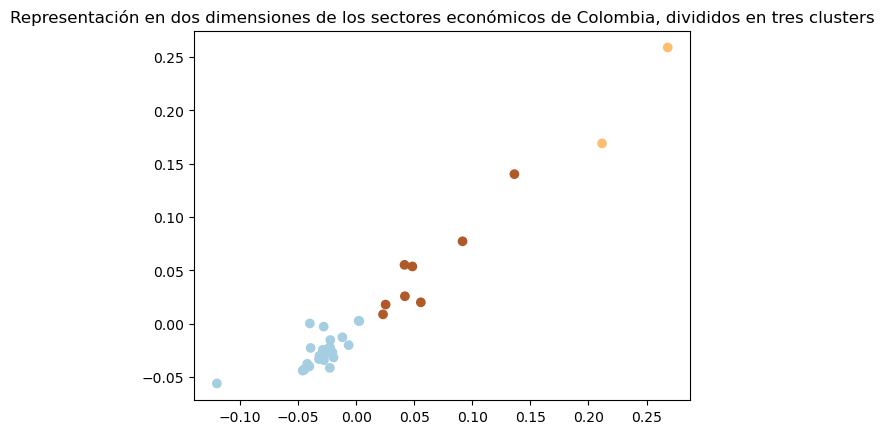

In [26]:
#tomamos los dos vectores más representativos
V = np.array([autovector1, autovector2]).reshape((40, 2))

#reducimos la matriz original según estos vectores
reduccion = Arr_n @ V

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(reduccion)


fig, ax = plt.subplots()
#graficamos
ax.scatter(x = reduccion[:, 0], y = reduccion[:, 1], c=clusters, cmap='Paired')
ax.set_title("Representación en dos dimensiones de los sectores económicos de Colombia, divididos en tres clusters")

## Matriz $H$

### Consigna 9 - 

Sea $H$

$H = A (I-A)^{-1}$

Reemplazando $(I-A)^{-1}$ por suma de potencias, tenemos,

$A (I-A)^{-1} = \lim_{n \to \infty}A \sum_{i=0}^{n}A^i = \lim_{n \to \infty}\sum_{i=1}^{n+1}A^i $

Entonces, $H$ es lo mismo pero la suma de potencias empieza desde $A$ y no desde la identidad. Tenemos,

$H = \lim_{n \to \infty}((I-A)^{-1} - I + A^{n+1}) = (I-A)^{-1} - I + \lim_{n \to \infty}A^{n+1}$

Como $\lim_{n \to \infty}A^{n+1} = 0$, podemos decir que, 

$H = (I-A)^{-1} - I$

### Consigna 10 - 

C:\Users\flopy\miniconda3\envs\alc\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


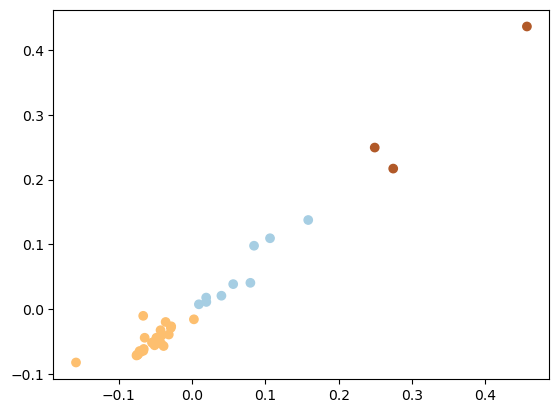

In [25]:
#calculamos H
H = Arr @ inv(np.identity(40)-Arr)

#normalizamos
H_n = E40 @ H

#hacemos la matriz de covarianza
C = H_n.T @ H_n / 39

#hallamos el primer par autovector-autovalor (el de mayor autovalor)
autovector1 = metodoPotenciaHotelling(C)
autovalor1 = autovector1.T @ C @ autovector1 / (np.linalg.norm(autovector1)**2)

#creamos una nueva matriz sin proyección en el autovector hallado, para evitar que
#aparezca en el método de la potencia
C_ = C - autovalor1 * np.outer(autovector1, autovector1)

#hallamos el segundo par autovector-autovalor
autovector2 = metodoPotenciaHotelling(C_)
autovalor2 = autovector2.T @ C_ @ autovector2 / (np.linalg.norm(autovector2)**2)


#tomamos los dos vectores más representativos
V = np.array([autovector1, autovector2]).reshape((40, 2))

#reducimos la matriz original según estos vectores
reduccion = H_n @ V

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(reduccion)

fig, ax = plt.subplots()
#graficamos
ax.scatter(x = reduccion[:, 0], y = reduccion[:, 1], c=clusters, cmap="Paired")
ax.set_title("Representación en dos dimensiones de la matriz H, dividida en tres clusters

### Consigna 11 - 